In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics
import math
import numpy as np

In [2]:
dataset = pd.read_csv('./health-dataset/word2vec.csv', names = [i for i in range(128)])

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.013595,-0.068772,-0.013126,0.006024,0.037922,-0.020872,-0.010325,0.008019,0.008064,0.011381,...,-0.020965,0.062473,-0.000060,-0.062621,-0.019586,0.046007,0.003811,0.011133,-0.040208,-0.041968
1,0.025009,-0.025586,0.012237,0.020567,0.014523,-0.018705,-0.058395,0.028054,-0.032362,0.020582,...,-0.034977,0.030475,0.038899,0.016926,-0.000666,0.007311,0.001348,0.008414,-0.013927,0.002399
2,0.031544,-0.025882,-0.060617,0.035992,0.037742,-0.021132,-0.041023,0.011076,0.003247,0.014427,...,-0.000146,0.000293,0.029334,-0.005735,-0.025683,0.028694,0.028692,0.049043,-0.011250,-0.029423
3,0.058714,-0.080251,-0.026101,0.060461,0.016714,-0.005205,-0.037441,0.051472,-0.063505,0.003247,...,-0.021879,0.017103,0.016472,-0.004953,-0.001521,-0.018822,0.020216,0.025708,-0.016543,0.012973
4,0.023366,-0.065667,-0.015601,0.022602,0.030365,-0.060590,-0.071055,-0.008641,-0.018728,0.042880,...,0.014219,0.051613,0.027316,-0.030006,-0.028209,0.064256,-0.019291,0.003725,-0.049937,-0.015975


In [66]:
max_clusters = 100

In [68]:
sse = {}
for k in range(1, max_clusters+1):
    print(k)
    km = KMeans(n_clusters=k, max_iter=1000, n_jobs=4).fit(dataset)
    #dataset["clusters"] = km.labels_
    #print(data["clusters"])
    sse[k] = km.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


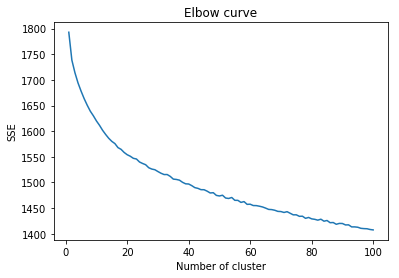

In [69]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Elbow curve')
plt.show()

In [70]:
class Point:
    def __init__(self,initx,inity):
        self.x = initx
        self.y = inity
    def distance_to_line(self, p1, p2):
        x_diff = p2.x - p1.x
        y_diff = p2.y - p1.y
        num = abs(y_diff*self.x - x_diff*self.y + p2.x*p1.y - p2.y*p1.x)
        den = math.sqrt(y_diff**2 + x_diff**2)
        return num / den

In [71]:
distances = []
p1 = Point(initx=1,inity=sse[1])
p2 = Point(initx=max_clusters,inity=sse[max_clusters])

In [72]:
for i in range(1,max_clusters+1):
    p = Point(initx=i,inity=sse[i])
    distances.append(p.distance_to_line(p1,p2))

In [73]:
distances

[4.342441042436583e-14,
 12.555558886365475,
 17.708067586877455,
 21.6847762516658,
 24.704958003180106,
 27.373689107326207,
 29.604401405235233,
 31.51888768997466,
 32.79459151820943,
 34.321656272804205,
 35.47884781179107,
 36.922659101352615,
 37.98588318429259,
 38.86889615202449,
 39.377407407962565,
 39.48446095086425,
 40.46805180356096,
 40.330890760851936,
 40.87018086998593,
 41.014636848668665,
 40.77531070568615,
 40.81884739929544,
 40.175674612790075,
 40.6618953844076,
 40.40975759936581,
 40.049050386568815,
 40.53654867311414,
 40.21884682022399,
 39.57140502509147,
 39.49392490410011,
 39.34548539027143,
 39.0061204065274,
 38.02913038971097,
 37.95363709735457,
 38.30958588975884,
 37.505203517897066,
 36.88833165848947,
 36.96196049896806,
 36.71704495460878,
 35.845674163029564,
 35.663740091441845,
 35.66484220382986,
 35.049180751391695,
 34.71650984055648,
 33.77372841926087,
 33.503895222363134,
 33.41303485482387,
 32.310565790746786,
 32.64851820987332,
 

In [74]:
best_cluster = np.argmax(distances)+1

In [75]:
best_cluster

20

In [55]:
km = KMeans(n_clusters=best_cluster, max_iter=1000, n_jobs=4).fit(dataset)

In [56]:
closest, distances = metrics.pairwise_distances_argmin_min(km.cluster_centers_, dataset)

In [57]:
closest

array([7194, 6536, 7987,  414, 8235, 8131,  414, 1049,  554, 1115])

In [58]:
distances

array([0.18842525, 0.17163846, 0.19545645, 0.22003418, 0.18969451,
       0.17531727, 0.2455529 , 0.1995928 , 0.17047441, 0.22026086])

In [59]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

In [60]:
silhouette

-0.0005114558122645671

In [62]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 1:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 1: It doesn't take much to damage your hearing at a sports bar or nightclub. That's why a billion people are at risk.

Cluster 1: RT @CNN: Forever young? Discover this island’s secrets to longevity on #TheWonderList w/ @BillWeirCNN 

Cluster 1: #FitNation: Finding the right life balance between family, work and getting fit.

Cluster 1: RT @drsanjaygupta: what are you having for dinner? a lot more #sugar thank you think..

Cluster 1: RT @cnni: Eat yourself healthy with these amazing superfoods:

Cluster 1: His 3 simple secrets to a long &amp; happy life? #TheWonderList w/ @BillWeirCNN Sun. 10p @CNN

Cluster 1: RT @milesobrien: Thanks to @drsanjaygupta @roniselig @susanchun1 @tinkertime @calebhell @AC360 for such a powerful film. I hope this teache…

Cluster 1: RT @CNNMoney: Would you ever try a kale smoothie made by @McDonalds?

Cluster 1: RT @CNNMoney: Dunkin' Donuts is pulling titanium dioxide from its ingredient list

Cluster 1: RT @drsanjaygupta: what @milesobrien teaches us

In [65]:
for i in enumerate(closest):
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: RT @RachelBegunRD: A1 Fact: Heart disease is THE leading cause of death for both men AND women. It is responsible for 1 in 4 deaths in America #healthtalk

Cluster 1: RT @eatsmartbd: Yes! Self interest is not being selfish! RT @SSDdotTV: A9: healthier you are, the longer you'll be around for your loved ones. #HealthTalk

Cluster 2: Blood sugar is NOT what matters most for preventing heart disease in people with #diabetes, new study finds

Cluster 3: A fight is brewing over #livertransplant donations. Would proposed changes turn the Midwest into an 'organ farm'?

Cluster 4: RT @NPF: What works for one person with #psoriasis might not work for another. Keep trying until you find the right regimen for you #healthtalk

Cluster 5: What is good for your heart, may lift your mood, will help you live longer and tastes delicious? Find out here:

Cluster 6: A fight is brewing over #livertransplant donations. Would proposed changes turn the Midwest into an 'organ farm'?

Cluster 7: Joh